In [9]:
import torch
from optimize_restarts import optimize_restarts

import os

import pickle
import matplotlib.pyplot as plt

from get_coords import get_coords
import numpy as np

from G_phi_psi import make_distmap

In [2]:
d = optimize_restarts('1z6mA02', '../../steps/predicted_outputs/1z6mA02.out', lr=0.05, momentum=0.3, iterations=10, verbose=1)

Iteration 000, Loss: 9601.190
Iteration 001, Loss: 7713.131
Iteration 002, Loss: 7263.578
Iteration 003, Loss: 6405.412
Iteration 004, Loss: 6030.703
Iteration 005, Loss: 6484.757
Iteration 006, Loss: 6024.520
Iteration 007, Loss: 6045.935
Iteration 008, Loss: 6405.469
Iteration 009, Loss: 6137.412
Iteration 010, Loss: 6024.520
Iteration 011, Loss: 6005.564
Iteration 012, Loss: 5980.988
Iteration 013, Loss: 5953.760
Iteration 014, Loss: 5927.848
Iteration 015, Loss: 5892.217
Iteration 016, Loss: 5849.814
Iteration 017, Loss: 5803.921
Iteration 018, Loss: 5762.705
Iteration 019, Loss: 5732.702
Iteration 020, Loss: 5732.702
Iteration 021, Loss: 5730.348
Iteration 022, Loss: 5727.419
Iteration 023, Loss: 5724.444
Iteration 024, Loss: 5721.827
Iteration 025, Loss: 5719.253
Iteration 026, Loss: 5716.663
Iteration 027, Loss: 5714.030
Iteration 028, Loss: 5711.292
Iteration 029, Loss: 5708.598


In [4]:
d = optimize_restarts('16pkA01', '../../steps/predicted_outputs/16pkA01.out', lr=0.05, momentum=0.3, iterations=10, verbose=1)

Iteration 000, Loss: 74085.242
Iteration 001, Loss: 66134.414
Iteration 002, Loss: 78554.539
Iteration 003, Loss: 81325.961
Iteration 004, Loss: 72756.180
Iteration 005, Loss: 71845.359
Iteration 006, Loss: 63591.398
Iteration 007, Loss: 81032.320
Iteration 008, Loss: 68512.305
Iteration 009, Loss: 63258.602


KeyboardInterrupt: 

# Experiments

In [5]:
domains = ['1z6mA02', '16pkA01']
lr = [0.1, 0.05, 0.01, 0.005, 0.001]
mom = [0.1, 0.3, 0.5, 0.7, 0.9]

for r in range(3):  # random states
    for d in domains:
        for l in lr:
            for m in mom:
                os.system(f'python3 optimize_restarts.py -d {d} -dp ../../steps/predicted_outputs/{d}.out -rs {r} -i 200 -lr {l} -m {m} -o ../../steps/folded_structures/restarted_optim/experiments/ -n 1')


---
# Data Analysis

In [10]:
rsl = [0, 1, 2]
lrl = [0.1, 0.05, 0.01, 0.005, 0.001]
mom = [0.1, 0.3, 0.5, 0.7, 0.9]

## small domain - 1z6mA02 - 61 residues

In [8]:
h_1z6m = {}


for f in os.listdir('../../steps/folded_structures/restarted_optim/experiments/1z6mA02/'):
    domain, rs, lr, m, e = f.split('_')
    
    with open(f'../../steps/folded_structures/restarted_optim/experiments/1z6mA02/{f}', 'rb') as s:
        o = pickle.load(s)
    h_1z6m[f'{rs}_{lr}_{m}'] = o['history']

In [13]:
a = h_1z6m['1_0.050_0.5']

In [16]:
len(a[0])

200

In [20]:
aa = torch.cat((torch.tensor(a[0]), torch.tensor(a[1]), torch.tensor(a[2])))

In [22]:
aa.shape

torch.Size([600, 2])

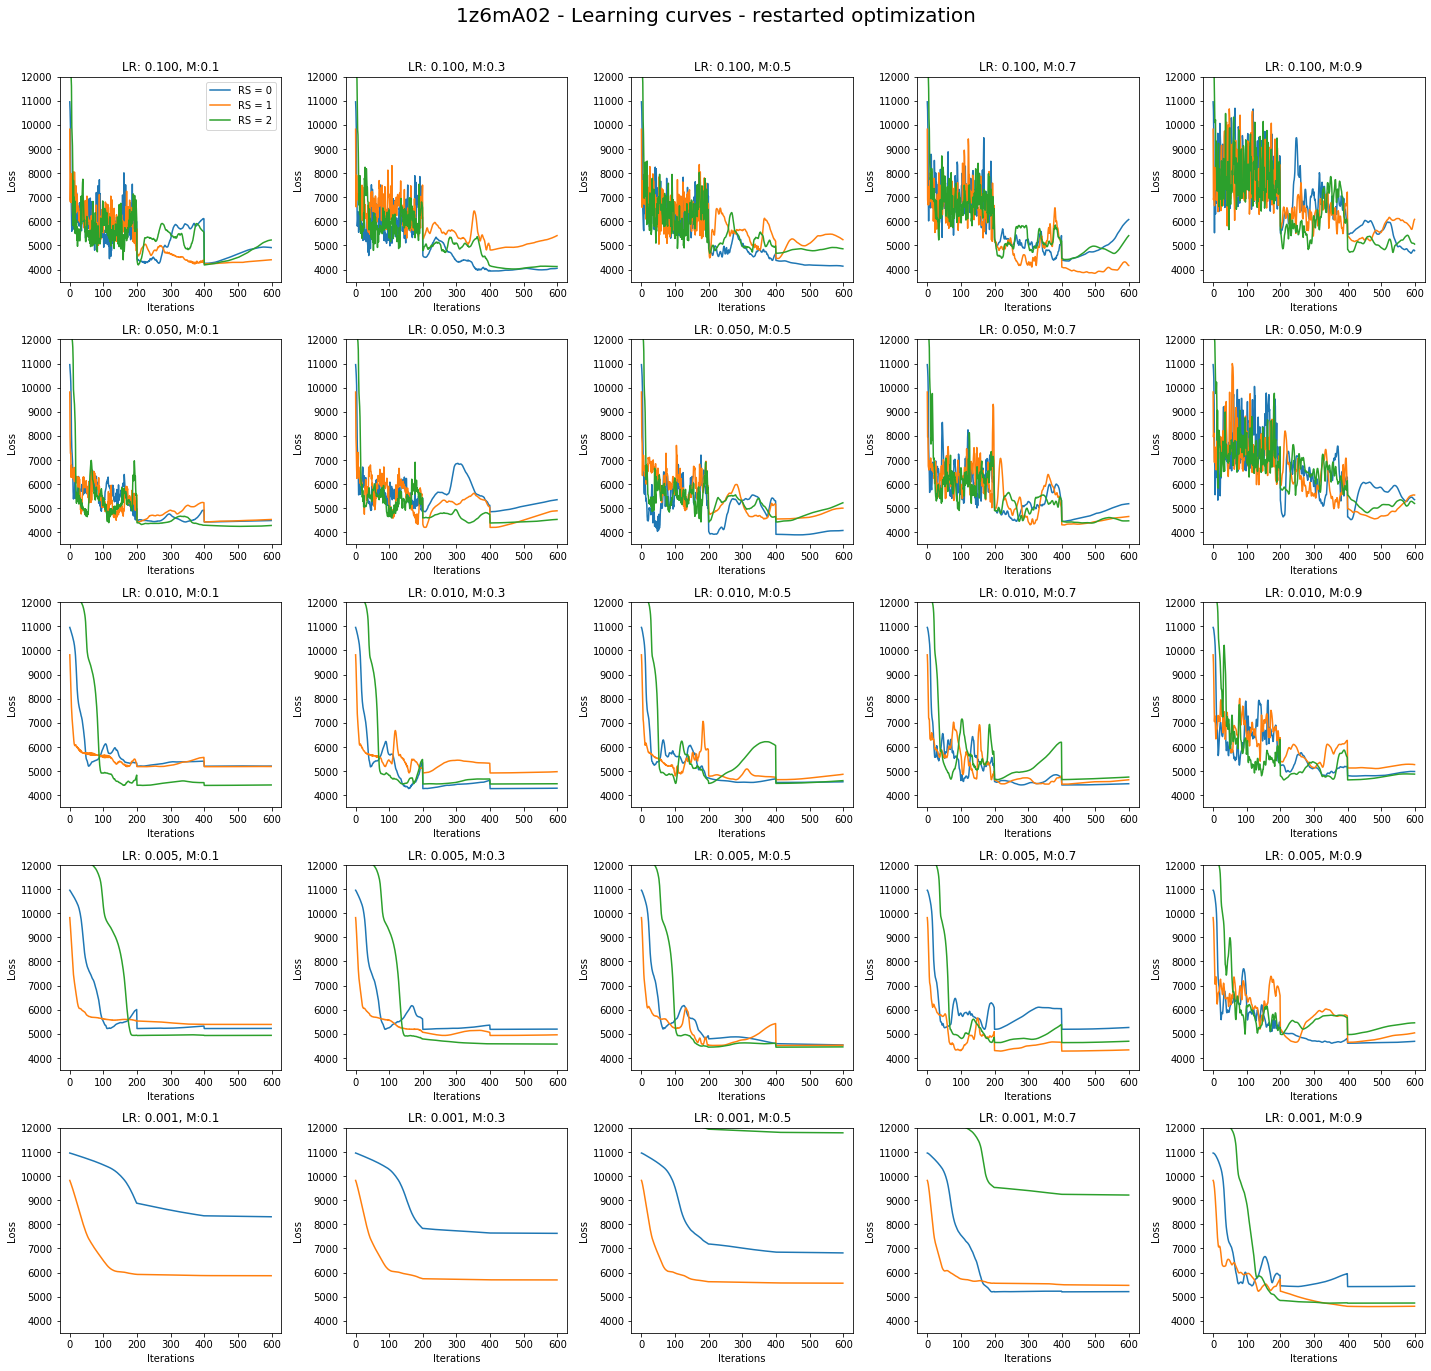

In [28]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i, l in enumerate(lrl):
    for j, m in enumerate(mom):
        for k, rs in enumerate(rsl):
            a = h_1z6m['{:d}_{:.3f}_{:.1f}'.format(rs, l, m)]
            h = torch.cat((torch.tensor(a[0]), torch.tensor(a[1]), torch.tensor(a[2])))
            ax[i, j].plot(h[:, 0], h[:, 1], label=f'RS = {rs}')
        ax[i, j].set_title('LR: {:.3f}, M:{:.1f}'.format(l, m))
        ax[i, j].set_xlabel('Iterations')
        ax[i, j].set_ylabel('Loss')
        ax[i, j].set_ylim(3500, 12000)

ax[0, 0].legend()
fig.suptitle('1z6mA02 - Learning curves - restarted optimization', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../../plots/structure_realization/1z6mA02_lrcrvs_rest_opt.png')

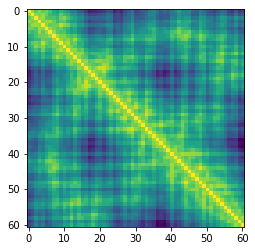

In [43]:
with open(f'../../steps/folded_structures/restarted_optim/experiments/1z6mA02/1z6mA02_0_0.050_0.7_pred.pkl', 'rb') as s:
    d = pickle.load(s)
    
with torch.no_grad():
    dd = d['beststructure'].G()
    
dd = dd + dd.t()

plt.imshow(dd, cmap='viridis_r')

In [36]:
d['beststructure'].pdb_coords(output_dir='restart_trials/')

## big(ger) domain - 16pkA01 - 188 residues

In [49]:
h_16pk = {}


for f in os.listdir('../../steps/folded_structures/restarted_optim/experiments/16pkA01/'):
    domain, rs, lr, m, e = f.split('_')
    
    with open(f'../../steps/folded_structures/restarted_optim/experiments/16pkA01/{f}', 'rb') as s:
        o = pickle.load(s)
    h_16pk[f'{rs}_{lr}_{m}'] = o['history']

In [50]:
rsl = [0, 1, 2]
lrl = [0.1, 0.05, 0.01, 0.005, 0.001]
mom = [0.1, 0.3, 0.5, 0.7, 0.9]

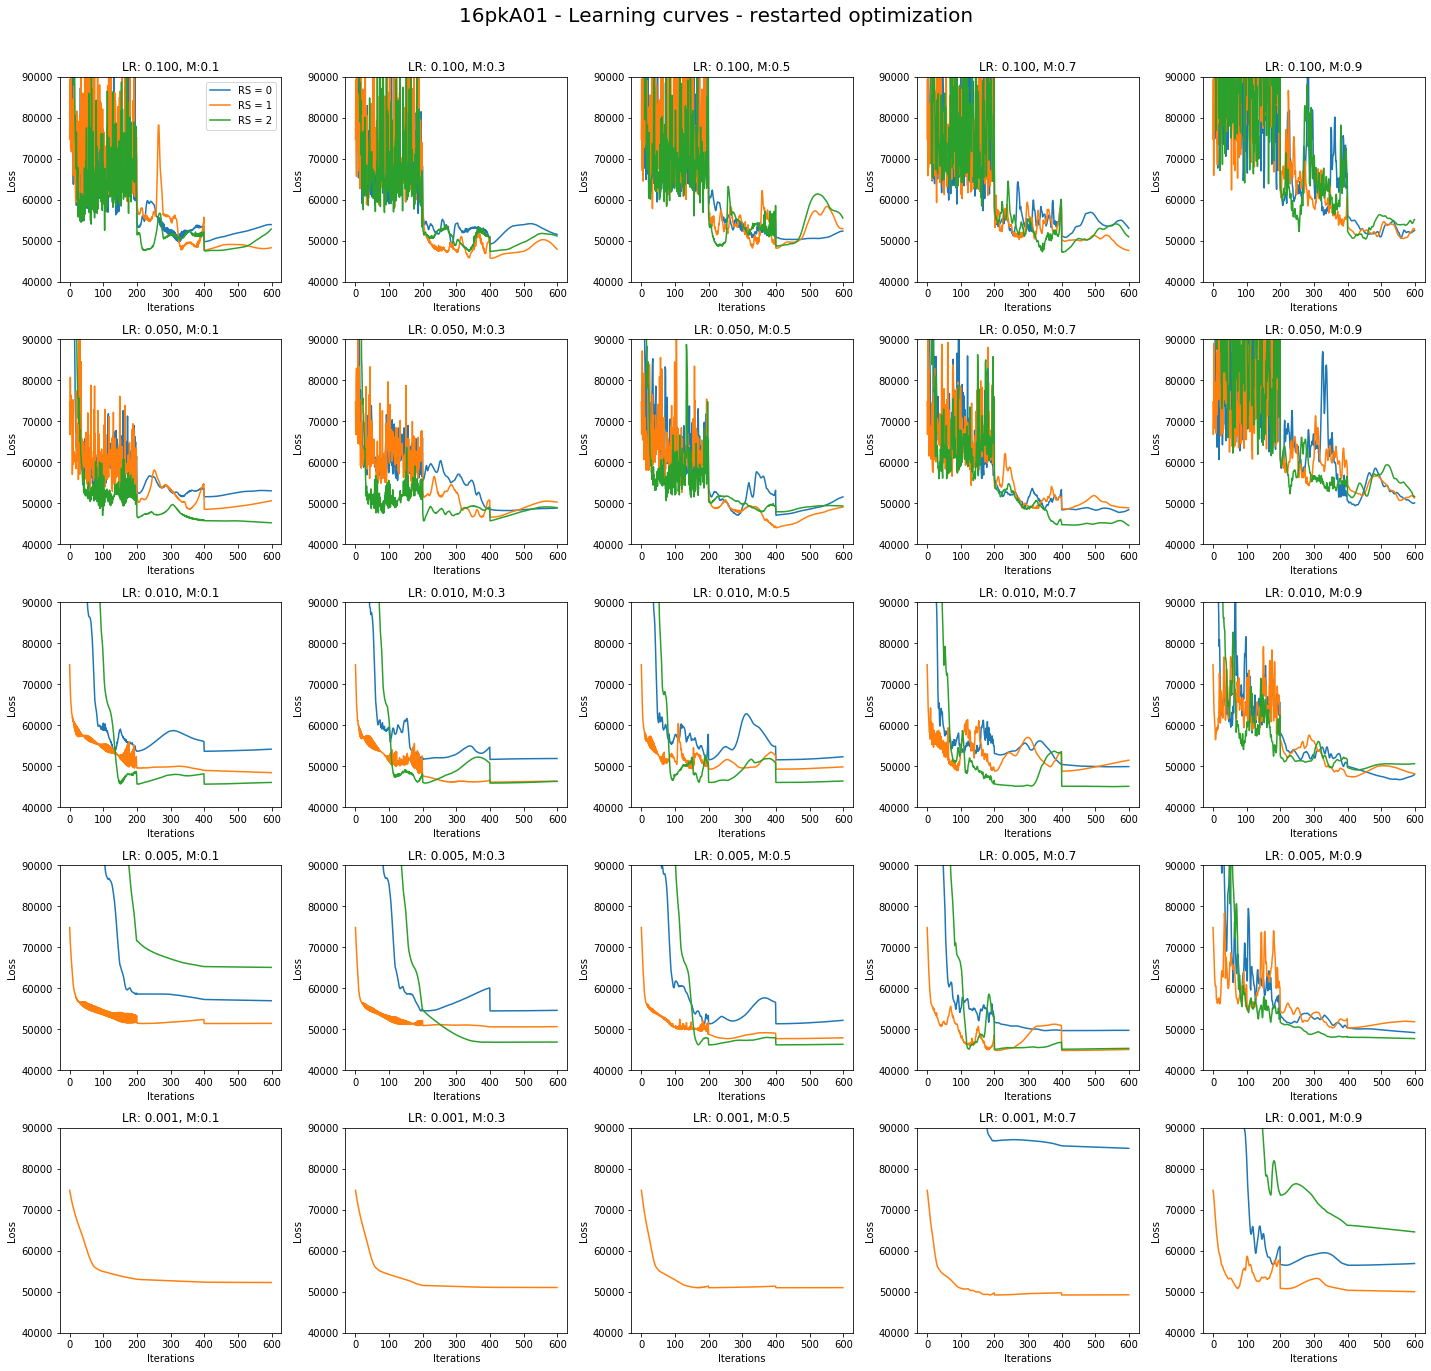

In [51]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i, l in enumerate(lrl):
    for j, m in enumerate(mom):
        for k, rs in enumerate(rsl):
            a = h_16pk['{:d}_{:.3f}_{:.1f}'.format(rs, l, m)]
            h = torch.cat((torch.tensor(a[0]), torch.tensor(a[1]), torch.tensor(a[2])))
            ax[i, j].plot(h[:, 0], h[:, 1], label=f'RS = {rs}')
        ax[i, j].set_title('LR: {:.3f}, M:{:.1f}'.format(l, m))
        ax[i, j].set_xlabel('Iterations')
        ax[i, j].set_ylabel('Loss')
        ax[i, j].set_ylim(40000, 90000)

ax[0, 0].legend()
fig.suptitle('16pkA01 - Learning curves - restarted optimization', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../../plots/structure_realization/16pkA01_lrcrvs_rest_opt.png')

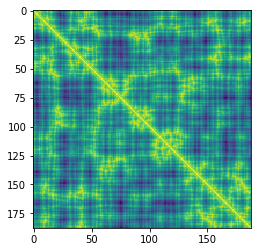

In [7]:
with open(f'../../steps/folded_structures/restarted_optim/experiments/16pkA01/16pkA01_2_0.050_0.7_pred.pkl', 'rb') as s:
    d = pickle.load(s)
    
with torch.no_grad():
    dd = d['beststructure'].G()
    
dd = dd + dd.t()

plt.imshow(dd, cmap='viridis_r')

In [48]:
d['beststructure'].pdb_coords(output_dir='restart_trials/')
dr = get_coords('16pkA01')
cbeta_coords = dr[dr[:, 3] == 'CB']

gly_coords = dr[dr[:, 2] == 'G']
gly_coords = gly_coords[gly_coords[:, 3] == 'CA']

full = np.concatenate((cbeta_coords, gly_coords))
ind = full[:, 0]
ind_sorted = np.argsort(ind.astype(np.int))

full = full[ind_sorted]

dmap = make_distmap(torch.from_numpy(full[:, 4:].astype(np.float)))

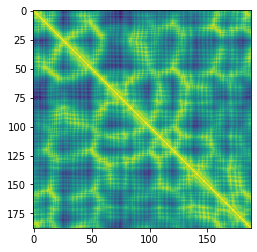

In [47]:
plt.imshow(dmap, cmap='viridis_r')

In [15]:
dmap.shape

torch.Size([734, 734])